In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%ls

gdrive/  sample_data/


In [3]:
%cd /content/gdrive/MyDrive/Dataset

/content/gdrive/MyDrive/Dataset


In [4]:
import gdal, osr
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import seaborn as sns
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
plt.style.use('ggplot')
import chardet
from osgeo import gdal

In [5]:
df = pd.read_excel("/content/gdrive/MyDrive/Dataset/Nov2018Data.csv")


#with open('/content/gdrive/MyDrive/Dataset/Nov2018.csv', 'rb') as f:
 #   result = chardet.detect(f.read())  # or readline if the file is large
#print(result)
#pd.read_csv('/content/gdrive/MyDrive/Dataset/Nov2018Data.csv', encoding= result[encoding])

In [ ]:
%pwd

'/content/gdrive/My Drive/Dataset'

In [ ]:
#for columns in df.columns:
 # print(columns)
df['Date'] = pd.to_datetime(df['Date']).apply(lambda x: x.date())
for index, row in df.iterrows():
    #print(row.LST)
    rowData = row.NDVI
    #print(rowData)
    hdf_ds = gdal.Open(rowData, gdal.GA_ReadOnly)  
    data = hdf_ds.GetSubDatasets()[0][0]
    NDVI = gdal.Open(data)
    row.NDVI = (NDVI.ReadAsArray())
    
    #passer = np.logical_and( NDVI > NDVI.min(), NDVI <= NDVI.max() )

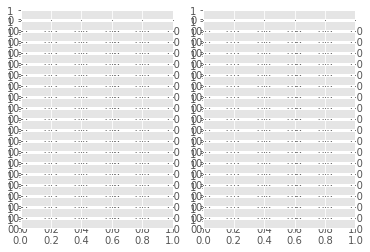

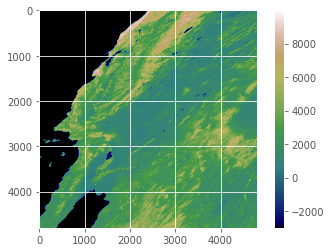

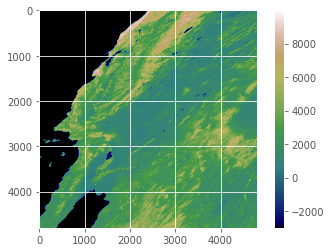

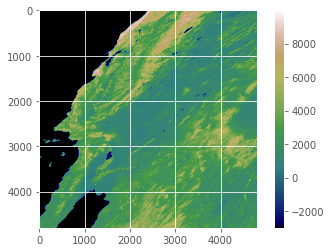

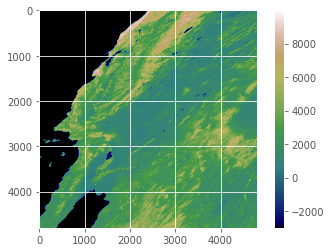

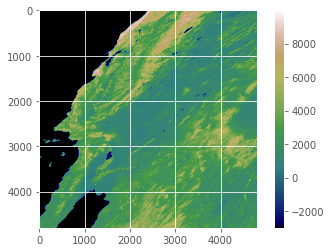

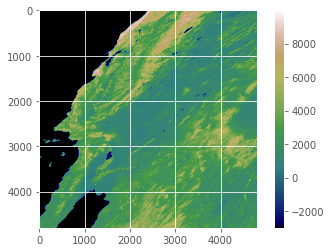

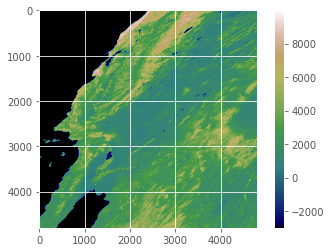

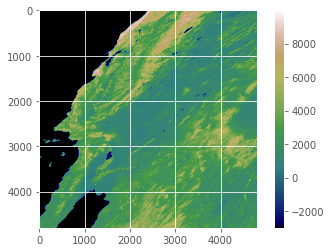

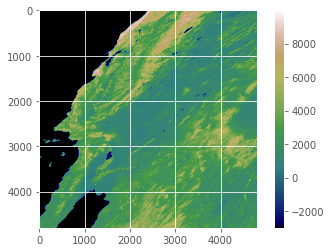

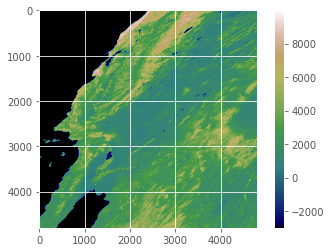

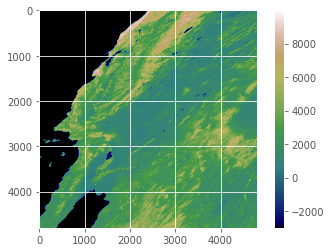

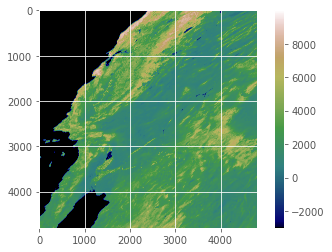

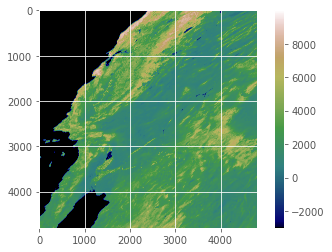

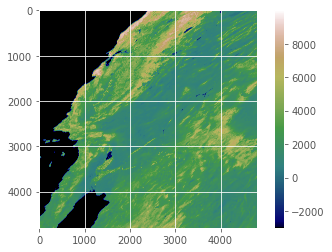

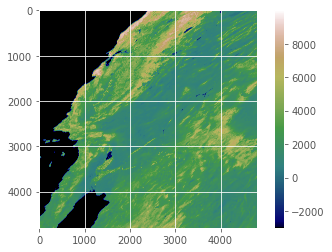

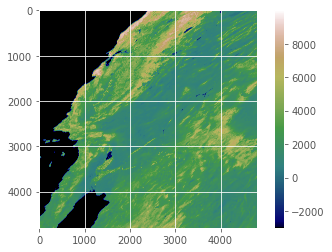

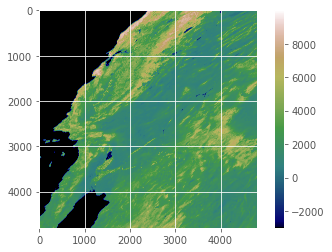

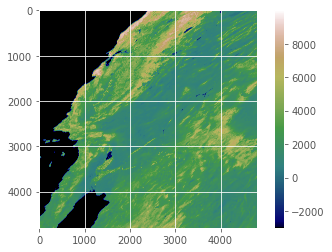

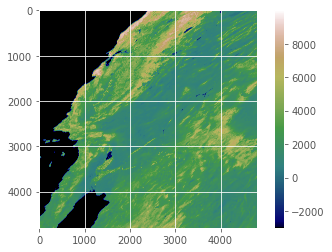

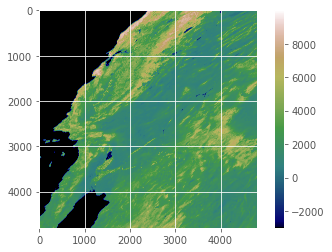

In [39]:
total_rows = df['Date'].count()
#fig, axs = plt.subplots(1, total_rows, figsize=(20,10))
fig, axes = plt.subplots(total_rows, 2)
for index, row in df.iterrows():
  plt.figure()
  plt.imshow(row.NDVI, vmin=row.NDVI.min(), cmap=plt.cm.gist_earth)
  plt.colorbar()

In [ ]:
passer = np.logical_and( NDVI > 0, NDVI <= 15851 )
(NDVI[passer].min(), NDVI[passer].max(), NDVI[passer].mean(), NDVI[passer].std())

[[-1000 -1000 -1000 ...  1410  1406  1327]
 [-1000 -1000 -1000 ...  1661  1384  1382]
 [-1000 -1000 -1000 ...  1582  1467  1448]
 ...
 [  859   982   946 ...  1061   995  1071]
 [  844   743   767 ...  1061   991   955]
 [  763   818   880 ...   967  1010   937]]


In [ ]:
#data[data == dset.fillvalue] = np.nan
#data = np.ma.masked_where(np.isnan(data), data)

AttributeError: ignored

In [ ]:
hdf_ds.GetSubDatasets(

[('HDF4_EOS:EOS_GRID:"/content/gdrive/MyDrive/data/MOD11A1.A2018311.h08v05.006.2018313174930.hdf":MODIS_Grid_Daily_1km_LST:LST_Day_1km',
  '[1200x1200] LST_Day_1km MODIS_Grid_Daily_1km_LST (16-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"/content/gdrive/MyDrive/data/MOD11A1.A2018311.h08v05.006.2018313174930.hdf":MODIS_Grid_Daily_1km_LST:QC_Day',
  '[1200x1200] QC_Day MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"/content/gdrive/MyDrive/data/MOD11A1.A2018311.h08v05.006.2018313174930.hdf":MODIS_Grid_Daily_1km_LST:Day_view_time',
  '[1200x1200] Day_view_time MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"/content/gdrive/MyDrive/data/MOD11A1.A2018311.h08v05.006.2018313174930.hdf":MODIS_Grid_Daily_1km_LST:Day_view_angl',
  '[1200x1200] Day_view_angl MODIS_Grid_Daily_1km_LST (8-bit unsigned integer)'),
 ('HDF4_EOS:EOS_GRID:"/content/gdrive/MyDrive/data/MOD11A1.A2018311.h08v05.006.2018313174930.hdf":MODIS_Grid_Daily_1km_LST:LST_Night_

In [ ]:
NDVI_Data = gdal.Open('HDF4_EOS:EOS_GRID:"/content/gdrive/MyDrive/data/MOD11A1.A2018311.h08v05.006.2018313174930.hdf":MODIS_Grid_Daily_1km_LST:LST_Day_1km')

In [ ]:
NDVI = NDVI_Data.ReadAsArray()

In [ ]:
print(NDVI.min(), NDVI.max(), NDVI.mean(), NDVI.std())

0 15851 11659.250108333334 6212.3488938516875


In [ ]:
passer = np.logical_and( NDVI > 0, NDVI <= 15851 )
(NDVI[passer].min(), NDVI[passer].max(), NDVI[passer].mean(), NDVI[passer].std())

(0.8810437452033768, 1.0, 0.9660161062881265, 0.017282287156160148)

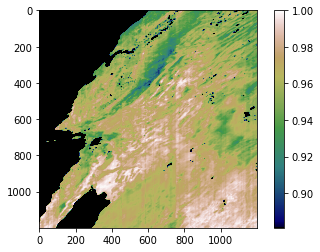

In [ ]:
import matplotlib.pyplot as plt
plt.imshow ( NDVI, vmin=0.8810437452033768, cmap=plt.cm.gist_earth)
plt.colorbar()

In [ ]:
coordinates = NDVI_Data.GetGeoTransform()
print(coordinates)

(-11119505.197665, 926.6254331383342, 0.0, 4447802.079066, 0.0, -926.6254331383334)


In [ ]:
from sklearn.preprocessing import normalize
NDVI = normalize(NDVI, axis=0, norm='max')

In [ ]:
print(NDVI)

[[0.         0.         0.         ... 0.928      0.93850059 0.95227865]
 [0.         0.         0.         ... 0.94452033 0.96179878 0.96223958]
 [0.         0.         0.         ... 0.96091057 0.96127815 0.95989583]
 ...
 [0.99729872 0.9947951  0.99347697 ... 0.99460163 0.99420799 0.99257812]
 [0.99426802 0.99354329 0.99354286 ... 0.99362602 0.99271118 0.990625  ]
 [0.99387271 0.99380683 0.99374053 ... 0.99349593 0.9904985  0.98951823]]


In [ ]:
LST_data = gdal.Open('HDF4_EOS:EOS_GRID:"/content/gdrive/MyDrive/data/MOD11A1.A2018311.h08v05.006.2018313174930.hdf":MODIS_Grid_Daily_1km_LST:Emis_31')

In [ ]:
LST = LST_data.ReadAsArray()

In [ ]:
print(LST.min(), LST.max(), LST.mean(), LST.std())

0 251 190.15330972222222 99.82112195219875


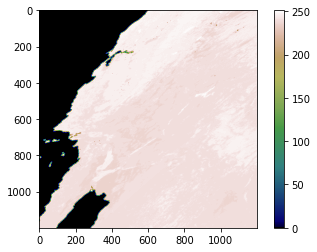

In [ ]:
plt.imshow ( LST, vmin=0 , cmap=plt.cm.gist_earth)
plt.colorbar()

In [ ]:
print(LST)

[[  0   0   0 ... 246 246 244]
 [  0   0   0 ... 246 242 243]
 [  0   0   0 ... 243 244 245]
 ...
 [241 241 241 ... 241 241 241]
 [241 241 241 ... 241 241 241]
 [241 241 241 ... 241 241 241]]


In [ ]:
LST = normalize(LST, axis=0, norm='max')